In [20]:
import sys
import os
sys.path.insert(0, './tools')
from sklearn.metrics import accuracy_score
from ipynb.fs.full.myTools import ORLLoad, MNISTLoad, PCA_transform, pre_process_data
from ipynb.fs.full.visualTools import PlotMnistExamples, PlotOrlExamples, PlotTable, Scatterplot2D
from ipynb.fs.full.Classifications import NearestC, NearestSubclassC, NearestN, BPE,MSE

import numpy as np


# Parameters

In [21]:
runMNIST = True
runORL = True

runNC = True
runNSC = True
runNN = True
runBPE = True
runMSE = True

cpus = 8

score_data = []
score_rowLabels = ()
score_colLabels = ("MNIST", "MNIST (PCA)", "ORL", "ORL (PCA)")


# Load data

In [22]:
if runMNIST:
    mnist_trainImgs, mnist_trainLbls, mnist_testImgs, mnist_testLbls = MNISTLoad()
    mnist_pca_trainImgs, mnist_pca_testImgs = PCA_transform(mnist_trainImgs, mnist_testImgs)
    print("MNIST Loaded!")
if runORL:
    orl_trainImgs, orl_trainLbls, orl_testImgs, orl_testLbls = ORLLoad()
    orl_pca_trainImgs, orl_pca_testImgs = PCA_transform(orl_trainImgs, orl_testImgs)
    print("ORL Loaded!")

MNIST Loaded!
ORL Loaded!


## Data examples plots

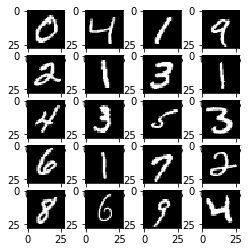

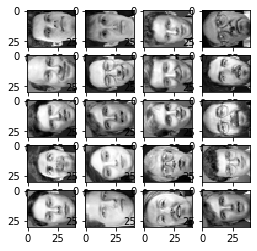

In [4]:
PlotMnistExamples(mnist_trainImgs)
PlotOrlExamples(orl_trainImgs)

# Run Nearest Centroid classifier

In [5]:
if runNC:
    if runMNIST:
        print("Running MNIST NC!")
        mnist_nc_results = NearestC().fit(mnist_trainImgs, mnist_trainLbls).predict(mnist_testImgs)
        mnist_nc_score = accuracy_score(mnist_testLbls, mnist_nc_results)
        print(mnist_nc_score)

        print("Running MNIST NC PCA!")
        mnist_nc_PCA_results = NearestC().fit(mnist_pca_trainImgs, mnist_trainLbls).predict(mnist_pca_testImgs)
        mnist_nc_PCA_score = accuracy_score(mnist_testLbls, mnist_nc_PCA_results)
        print(mnist_nc_PCA_score)
        
    if runORL:
        print("Running ORL NC!")
        orl_nc_results = NearestC().fit(orl_trainImgs, orl_trainLbls).predict(orl_testImgs)
        orl_nc_score = accuracy_score(orl_testLbls, orl_nc_results)
        print(orl_nc_score)
        
        print("Running ORL NC PCA!")
        orl_nc_PCA_results = NearestC().fit(orl_pca_trainImgs, orl_trainLbls).predict(orl_pca_testImgs)
        orl_nc_PCA_score = accuracy_score(orl_testLbls, orl_nc_PCA_results)
        print(orl_nc_PCA_score)
        
    
    score_rowLabels = score_rowLabels + ("NC",)
    score_data.append([mnist_nc_score,mnist_nc_PCA_score,orl_nc_score,orl_nc_PCA_score])
    
else:
    print("NC Skipped!")

Running MNIST NC!
0.8203
Running MNIST NC PCA!
0.4365
Running ORL NC!
0.95
Running ORL NC PCA!
0.39166666666666666


## NC Plots

MNIST PCA Data scatterplot from test data and classification results:


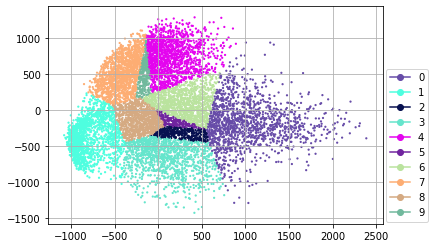

ORL PCA Data scatterplot from test data and classification results:


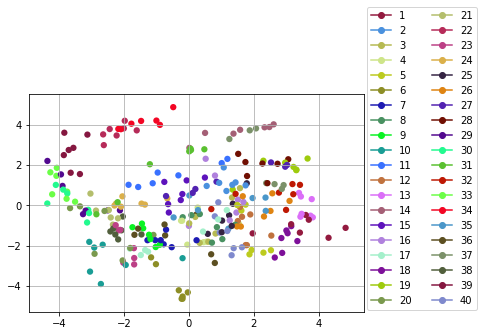

In [12]:
if runNC:
    if runMNIST:
        print("MNIST PCA Data scatterplot from test data and classification results:")
        Scatterplot2D(mnist_pca_testImgs, mnist_nc_PCA_results, "NC_MNIST_PCA_SCATTERPLOT")
    if runORL:
        print("ORL PCA Data scatterplot from test data and classification results:")
        Scatterplot2D(orl_pca_trainImgs, orl_trainLbls, "NC_ORL_PCA_SCATTERPLOT")

# Run Nearest Subclass Centroid classifier

In [21]:
if runNSC:
    if runMNIST:
        print("Running MNIST NSC! (2)")
        mnist_nsc2_results = NearestSubclassC(2).fit(mnist_trainImgs, mnist_trainLbls).predict(mnist_testImgs)
        mnist_nsc2_score = accuracy_score(mnist_testLbls, mnist_nsc2_results)
        print(mnist_nsc2_score)
        
        print("Running MNIST NSC! (3)")
        mnist_nsc3_results = NearestSubclassC(3).fit(mnist_trainImgs, mnist_trainLbls).predict(mnist_testImgs)
        mnist_nsc3_score = accuracy_score(mnist_testLbls, mnist_nsc3_results)
        print(mnist_nsc3_score)
        
        print("Running MNIST NSC! (5)")
        mnist_nsc5_results = NearestSubclassC(5).fit(mnist_trainImgs, mnist_trainLbls).predict(mnist_testImgs)
        mnist_nsc5_score = accuracy_score(mnist_testLbls, mnist_nsc5_results)
        print(mnist_nsc5_score)
        
        print("Running MNIST NSC! (2) PCA")
        mnist_nsc2_pca_results = NearestSubclassC(2).fit(mnist_pca_trainImgs, mnist_trainLbls).predict(mnist_pca_testImgs)
        mnist_nsc2_pca_score = accuracy_score(mnist_testLbls, mnist_nsc2_pca_results)
        print(mnist_nsc2_pca_score)
        
        print("Running MNIST NSC! (3) PCA")
        mnist_nsc3_results = NearestSubclassC(3).fit(mnist_pca_trainImgs, mnist_trainLbls).predict(mnist_pca_testImgs)
        mnist_nsc3_pca_score = accuracy_score(mnist_testLbls, mnist_nsc3_results)
        print(mnist_nsc3_pca_score)
        
        print("Running MNIST NSC! (5) PCA")
        mnist_nsc5_results = NearestSubclassC(5).fit(mnist_pca_trainImgs, mnist_trainLbls).predict(mnist_pca_testImgs)
        mnist_nsc5_pca_score = accuracy_score(mnist_testLbls, mnist_nsc5_results)
        print(mnist_nsc5_pca_score)
        
    if runORL:
        print("Running ORL NSC! (2)")
        orl_nsc2_results = NearestSubclassC(2).fit(orl_trainImgs, orl_trainLbls).predict(orl_testImgs)
        orl_nsc2_score = accuracy_score(orl_testLbls, orl_nsc2_results)
        print(orl_nsc2_score)
        
        print("Running ORL NSC! (3)")
        orl_nsc3_results = NearestSubclassC(3).fit(orl_trainImgs, orl_trainLbls).predict(orl_testImgs)
        orl_nsc3_score = accuracy_score(orl_testLbls, orl_nsc3_results)
        print(orl_nsc3_score)
        
        print("Running ORL NSC! (5)")
        orl_nsc5_results = NearestSubclassC(5).fit(orl_trainImgs, orl_trainLbls).predict(orl_testImgs)
        orl_nsc5_score = accuracy_score(orl_testLbls, orl_nsc5_results)
        print(orl_nsc5_score)
        
        print("Running ORL NSC! (2) PCA")
        orl_nsc2_pca_results = NearestSubclassC(2).fit(orl_pca_trainImgs, orl_trainLbls).predict(orl_pca_testImgs)
        orl_nsc2_pca_score = accuracy_score(orl_testLbls, orl_nsc2_pca_results)
        print(orl_nsc2_pca_score)
        
        print("Running ORL NSC! (3) PCA")
        orl_nsc3_pca_results = NearestSubclassC(3).fit(orl_pca_trainImgs, orl_trainLbls).predict(orl_pca_testImgs)
        orl_nsc3_pca_score = accuracy_score(orl_testLbls, orl_nsc3_pca_results)
        print(orl_nsc3_pca_score)
        
        print("Running ORL NSC! (5) PCA")
        orl_nsc5_pca_results = NearestSubclassC(5).fit(orl_pca_trainImgs, orl_trainLbls).predict(orl_pca_testImgs)
        orl_nsc5_pca_score = accuracy_score(orl_testLbls, orl_nsc5_pca_results)
        print(orl_nsc5_pca_score)
        
    score_rowLabels = score_rowLabels + ("NSC (2)","NSC (3)","NSC (5)",)
    score_data.append([mnist_nsc2_score,mnist_nsc2_pca_score,orl_nsc2_score,orl_nsc2_pca_score])
    score_data.append([mnist_nsc3_score,mnist_nsc3_pca_score,orl_nsc3_score,orl_nsc3_pca_score])
    score_data.append([mnist_nsc5_score,mnist_nsc5_pca_score,orl_nsc5_score,orl_nsc5_pca_score])
    
else:
    print("NSC Skipped!")

Running MNIST NSC! (2)
0.8607
Running MNIST NSC! (3)
0.8817
Running MNIST NSC! (5)
0.9042
Running MNIST NSC! (2) PCA
0.4301
Running MNIST NSC! (3) PCA
0.4249
Running MNIST NSC! (5) PCA
0.4182
Running ORL NSC! (2)
0.0
Running ORL NSC! (3)
0.0
Running ORL NSC! (5)
0.0
Running ORL NSC! (2) PCA
0.03333333333333333
Running ORL NSC! (3) PCA
0.041666666666666664
Running ORL NSC! (5) PCA
0.016666666666666666


MNIST PCA Data scatterplot from test data and classification results:


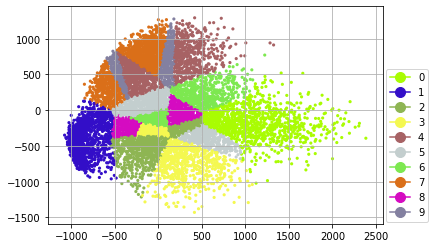

ORL PCA Data scatterplot from test data and classification results:


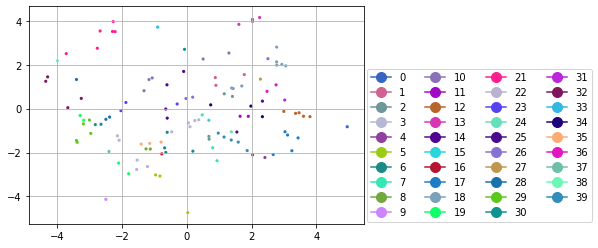

In [22]:
if runNSC:
    if runMNIST:
        print("MNIST PCA Data scatterplot from test data and classification results:")
        Scatterplot2D(mnist_pca_testImgs, mnist_nsc2_pca_results, "NSC2_MNIST_PCA_SCATTERPLOT")
    if runORL:
        print("ORL PCA Data scatterplot from test data and classification results:")
        Scatterplot2D(orl_pca_testImgs, orl_nsc2_pca_results, "NSC2_ORL_PCA_SCATTERPLOT")

# Run Nearest Neighbour classifier

In [17]:
if runNN:
    if runMNIST:
        print("Running MNIST NN!")
        mnist_nn_results = NearestN(3,cpus).fit(mnist_trainImgs, mnist_trainLbls).predict(mnist_testImgs)
        mnist_nn_score = accuracy_score(mnist_testLbls, mnist_nn_results)
        print(mnist_nn_score)
        print("Running MNIST NN! PCA")
        mnist_nn_results = NearestN(3,cpus).fit(mnist_pca_trainImgs, mnist_trainLbls).predict(mnist_pca_testImgs)
        mnist_nn_pca_score = accuracy_score(mnist_testLbls, mnist_nn_results)
        print(mnist_nn_pca_score)
    if runORL:
        print("Running ORL NN!")
        orl_nn_results = NearestN(3,cpus).fit(orl_trainImgs, orl_trainLbls).predict(orl_testImgs)
        orl_nn_score = accuracy_score(orl_testLbls, orl_nn_results)
        print(orl_nn_score)
        print("Running ORL NN! PCA")
        orl_nn_results = NearestN(3,cpus).fit(orl_pca_trainImgs, orl_trainLbls).predict(orl_pca_testImgs)
        orl_nn_pca_score = accuracy_score(orl_testLbls, orl_nn_results)
        print(orl_nn_pca_score)
        
    score_rowLabels = score_rowLabels + ("NN",)
    score_data.append([mnist_nn_score,mnist_nn_pca_score,orl_nn_score,orl_nn_pca_score])
else:
    print("NN Skipped!")

Running MNIST NN!
0.9717
Running MNIST NN! PCA
0.4017
Running ORL NN!
0.95
Running ORL NN! PCA
0.475


# Run Backpropagation Perceptron classifier

In [30]:
if runBPE:
    if runMNIST:
        print("Running MNIST BPE!")
        mnist_trainData_p, mnist_trainLbls_p, mnist_testData_p, mnist_testLbls_p = pre_process_data(mnist_trainImgs, mnist_trainLbls, mnist_testImgs, mnist_testLbls)        
        mnist_bpe_results = BPE().fit(mnist_trainData_p, mnist_trainLbls_p, hiddenSize=50, learningRate=0.1, iterations=2500).predict(mnist_testData_p)
        mnist_bpe_score = accuracy_score(mnist_testLbls, mnist_bpe_results)
        print (mnist_bpe_score)
        print("Running MNIST BPE! PCA")
        mnist_trainData_p, mnist_trainLbls_p, mnist_testData_p, mnist_testLbls_p = pre_process_data(mnist_pca_trainImgs, mnist_trainLbls, mnist_pca_testImgs, mnist_testLbls)        
        mnist_bpe_results = BPE().fit(mnist_trainData_p, mnist_trainLbls_p, hiddenSize=50, learningRate=0.1, iterations=2500).predict(mnist_testData_p)
        mnist_bpe_pca_score = accuracy_score(mnist_testLbls, mnist_bpe_results)
        print (mnist_bpe_pca_score)
    if runORL:
        print("Running ORL BPE!")
        orl_trainData_p, orl_trainLbls_p, orl_testData_p, orl_testLbls_p = pre_process_data(orl_trainImgs, orl_trainLbls, orl_testImgs, orl_testLbls)        
        orl_bpe_results = BPE().fit(orl_trainData_p, orl_trainLbls_p, hiddenSize=111, learningRate=0.1, iterations=2000).predict(orl_testData_p)
        orl_bpe_score = accuracy_score(orl_testLbls, orl_bpe_results)
        print (orl_bpe_score)
        print("Running ORL BPE! PCA")
        orl_trainData_p, orl_trainLbls_p, orl_testData_p, orl_testLbls_p = pre_process_data(orl_pca_trainImgs, orl_trainLbls, orl_pca_testImgs, orl_testLbls)        
        orl_bpe_results = BPE().fit(orl_trainData_p, orl_trainLbls_p, hiddenSize=111, learningRate=0.1, iterations=2000).predict(orl_testData_p)
        orl_bpe_pca_score = accuracy_score(orl_testLbls, orl_bpe_results)
        print (orl_bpe_pca_score)
        
    score_rowLabels = score_rowLabels + ("BPE",)
    score_data.append([mnist_bpe_score,mnist_bpe_pca_score,orl_bpe_score,orl_bpe_pca_score])
else:
    print("BPE Skipped!")

0.8265
0.8218
0.8228
0.8185
0.8247
0.8232
0.8252
0.8287
0.8251
0.8302
0.8117
0.822
0.8153
0.8228
0.8281
0.8362
0.822
0.8193
0.8204
0.8257
0.8211
0.8204
0.8181
0.8356
0.8214


KeyboardInterrupt: 

# Run MSE Perceptron classifier


In [32]:
if runMSE:
    if runMNIST:
        print("Running MSE mnist!")
        mnist_mse_result = MSE().fit(mnist_trainImgs, mnist_trainLbls, 100).predict(mnist_testImgs)
        mnist_mse_score = accuracy_score(mnist_testLbls, mnist_mse_result)
        print (mnist_mse_score)
        print("Running MSE mnist! PCA")
        mnist_mse_result = MSE().fit(mnist_pca_trainImgs, mnist_trainLbls, 1000).predict(mnist_pca_testImgs)
        mnist_mse_pca_score = accuracy_score(mnist_testLbls, mnist_mse_result)
        print (mnist_mse_pca_score)
    if runORL:
        print("Running MSE ORL!")
        orl_mse_result = MSE().fit(orl_trainImgs, orl_trainLbls, 100).predict(orl_testImgs)
        orl_mse_score = accuracy_score(orl_testLbls, orl_mse_result)
        print (orl_mse_score)
        print("Running MSE ORL! PCA")
        orl_mse_result = MSE().fit(orl_pca_trainImgs, orl_trainLbls, 100).predict(orl_pca_testImgs)
        orl_mse_pca_score = accuracy_score(orl_testLbls, orl_mse_result)
        print (orl_mse_pca_score)
        
    score_rowLabels = score_rowLabels + ("MSE",)
    score_data.append([mnist_mse_score,mnist_mse_pca_score,orl_mse_score,orl_mse_pca_score])
else:
    print("MSE Skipped!")

Running MSE mnist!
0.8602
Running MSE mnist! PCA
0.3248
Running MSE ORL!
0.0
Running MSE ORL! PCA
0.016666666666666666


# Create score result table

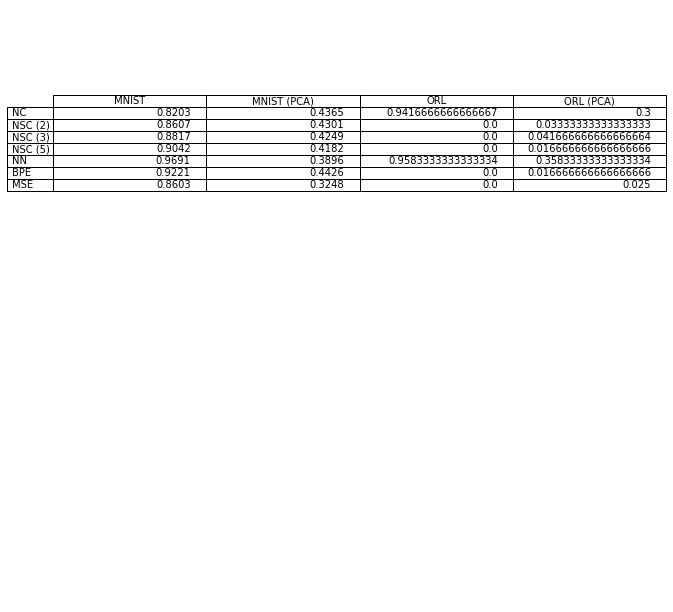

In [26]:
PlotTable(score_data,score_colLabels, score_rowLabels)

In [31]:
10**2

100